<a href="https://colab.research.google.com/github/anamilanezi/ebac-dados/blob/main/exercicios/em14-visualizacao-de-dados-I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Visualização de Dados I
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Pacote Seaborn;</li>
  <li>Categorias: Gráficos de Barras e de Setores;</li>
  <li>Tendências: Gráficos de Linha e de Área.</li>
</ol>

---

# **Exercícios**

Nestes exercícios, você deve decidir qual é o gráfico visto em aula que melhor visualiza uma base de dados. Após decidir, você deverá criar a visualização usando o conteúdo exposto durante a aula e adicionar um pequeno parágrafo sobre um insights que pode ser extraido do gráfico.

## 1\. Preço do diamante por tipo de corte

Context
This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

Content
price price in US dollars (\$326--\$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)

In [1]:
import seaborn as sns

data = sns.load_dataset("diamonds")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [2]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Visto que X, Y e Z são variáveis que representam dimensões, a ocorrência de valores nulos pode representar uma incosistência nos dados, por isso optei por removê-los da análise.


In [18]:
data.query("x == 0 or y == 0 or x == 0")

,carat,cut,color,clarity,depth,table,price,x,y,z
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.0,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.00,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.00,0.0
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.00,0.0
26243,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.00,0.0
27429,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.00,0.0
49556,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0


In [19]:
data = data.drop(data[data['x'] == 0].index)
data = data.drop(data[data['y'] == 0].index)
data = data.drop(data[data['z'] == 0].index)

In [21]:
data[['cut', 'color', 'clarity']].describe() 

,cut,color,clarity
count,53920,53920,53920
unique,5,7,8
top,Ideal,G,SI1
freq,21548,11284,13063


In [40]:
ordem_corte = ["Fair", "Good", "Very Good", "Premium", "Ideal"]

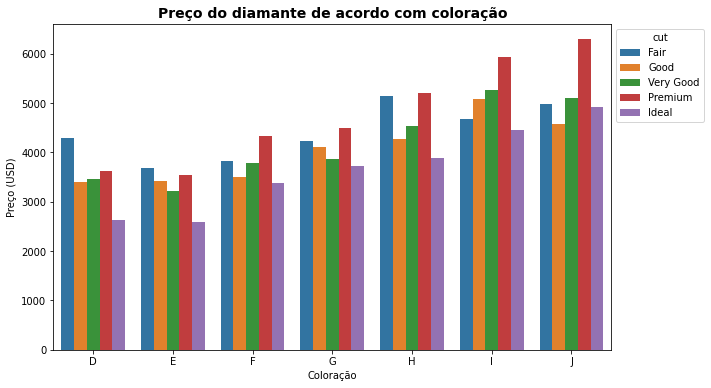

In [80]:
# gráfico do exercício 1
import matplotlib.pyplot as plt


diamonds = sns.barplot(data=data, x="color", y="price", hue="cut", hue_order=ordem_corte, ci=None)
sns.move_legend(diamonds, "upper left", bbox_to_anchor=(1, 1))
diamonds.set_title("Preço do diamante de acordo com coloração", fontsize=14, fontweight="bold");
diamonds.set(xlabel="Coloração", ylabel="Preço (USD)")
diamonds.figure.set_size_inches(10,6)

# Coloração H apresenta valores semelhantes entre corte "fair" e "premium"
# Coloração D tem maior valor para corte "fair"

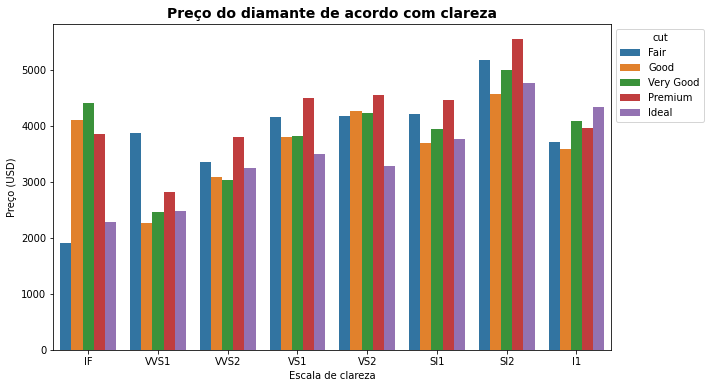

In [69]:

diamonds_2 = sns.barplot(data=data, x="clarity", y="price", hue="cut", hue_order=ordem_corte, ci=None)
sns.move_legend(diamonds_2, "upper left", bbox_to_anchor=(1, 1))
diamonds_2.set_title("Preço do diamante de acordo com clareza", fontsize=14, fontweight="bold");
diamonds_2.set(xlabel="Escala de clareza", ylabel="Preço (USD)")
diamonds_2.figure.set_size_inches(10,6)

# Diamantes com qualidade "Fair" atingem valores semelhantes aos de qualidade "Premium" com classificação SI2 de clareza, ultrapassam para "WS1"

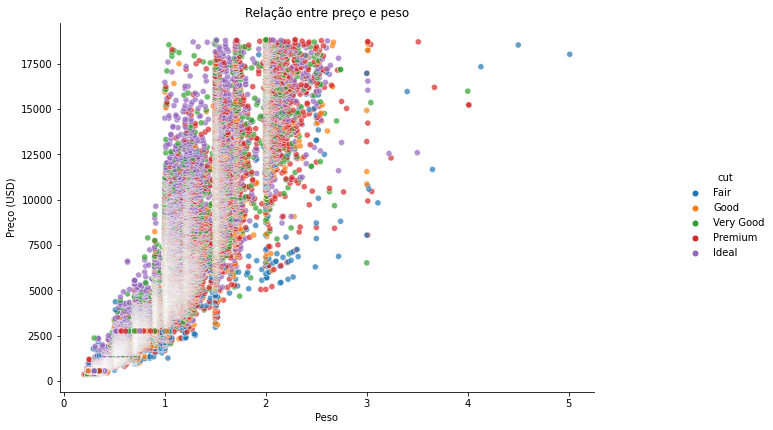

In [108]:
diamonds_3 = sns.relplot(data=data, y='price', x='carat', hue='cut', hue_order=ordem_corte, alpha=0.7)
diamonds_3.set(title="Relação entre preço e peso", xlabel="Peso", ylabel="Preço (USD)")
diamonds_3.fig.set_size_inches(12, 6)


[Text(0, 0.5, 'Frequência'), Text(0.5, 0, 'Preço')]

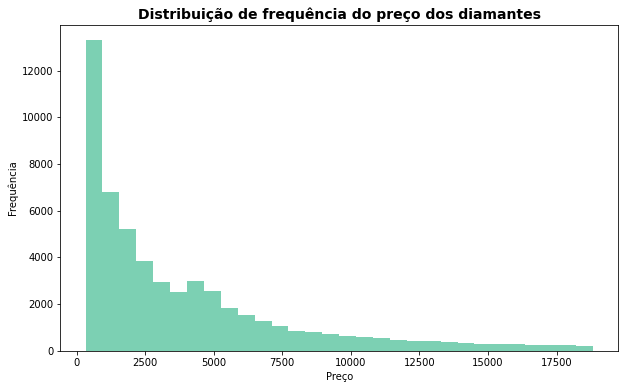

In [110]:
# Remover a borda
sns.set_context(rc = {'patch.linewidth': 0.0})
histograma_preco = sns.histplot(data['price'], bins=30, color="#50c19a")
histograma_preco.figure.set_size_inches(10,6)
histograma_preco.set_title("Distribuição de frequência do preço dos diamantes", fontsize=14, fontweight="bold");
histograma_preco.set(xlabel="Preço", ylabel="Frequência")

**Insight do gráfico 1**: ...

---

## 2\. Número de passageiros em dezembro por ano

In [ ]:
import seaborn as sns

data = sns.load_dataset("flights")
data.head()

In [ ]:
# gráfico do exercício 2

flights = ...

**Insight do gráfico 2**: ...

---

## 3\. Numero de passageiros por mês entre 1949 e 1959

In [ ]:
import seaborn as sns

data = sns.load_dataset("flights")
data.head()

In [ ]:
# gráfico do exercício 3

flights = ...

**Insight do gráfico 3**: ...

---